# Übung 1: Bildmanipulationen mit OpenCV und numpy
##### Student: Adrian Kauz  
***

### Einführung

In dieser Übung sollen einfache Bildoperationen mit OpenCV und numpy durchgeführt werden.

#### Dokumentation
Documentation von OpenCV gibt es auf:

https://docs.opencv.org/3.4.0/

und von numpy auf

https://docs.scipy.org/doc/numpy-1.13.0/index.html

(siehe auch das *Help* Menu im jupyter Fenster)

### Imports

In [3]:
# OpenCV needs to be included first
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Matplot-Params

In [4]:
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi']= 100
plt.rcParams['lines.linewidth']= 1

### Aufgabe 1: Laden und Darstellung von Bildern

Die folgenden Zeilen laden ein Bild. Konvertieren Sie das Bild nach RGB und stellen Sie es dar.

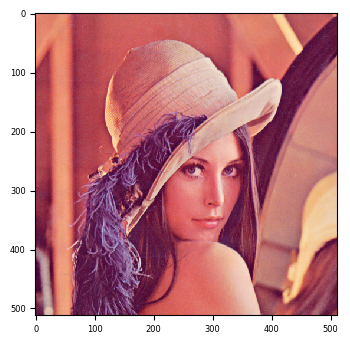

In [5]:
image = cv2.imread('images/lena.png')
image_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


Spiegeln sie das Bild an der vertikalen und horizontalen Achse und stellen Sie die Bilder dar.

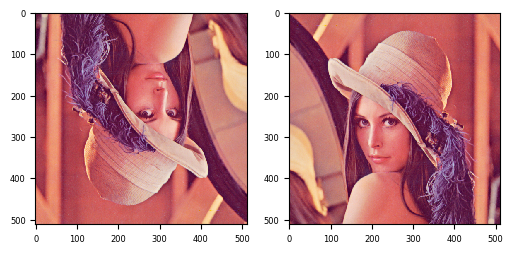

In [6]:
image_mirror_vert = cv2.flip(image_rgb, 0);
image_mirror_hor = cv2.flip(image_rgb, 1);
plt.subplot(1, 2, 1)
plt.imshow(image_mirror_vert)
plt.subplot(1, 2, 2)
plt.imshow(image_mirror_hor)

### Aufgabe 2: Darstellung von Grauwert Bilder
Konvertieren Sie das Bild in ein Grauwert Bild und stellen Sie dieses dar. Per default wird ein 1-Kanal Bild farbig mit einer default Color Map dargestellt. Um das Bild wirklich in grau zu zeichnen kann der Parameter `cmap='gray'` für `imshow` mitgegeben werden.

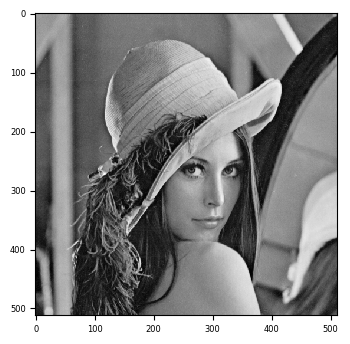

In [7]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,'gray')

### Aufgabe 3: Bild Kanäle
Stellen Sie die Anteile des rot, grün und blau Kanals einzeln (als Grauwert Bild) dar.

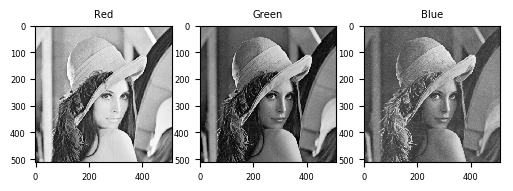

In [17]:
image_red = image_rgb[:,:,0]
image_green = image_rgb[:,:,1]
image_blue = image_rgb[:,:,2]

plt.subplot(1, 3, 1)
plt.title('Red')
plt.imshow(image_red, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Green')
plt.imshow(image_green, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Blue')
plt.imshow(image_blue, cmap='gray')

Erstellen Sie nun wieder ein Farbbilder aus den 3 Kanälen, sie können die Kanäle auch anders mischen. Verwenden Sie die numpy Funktion `stack`.

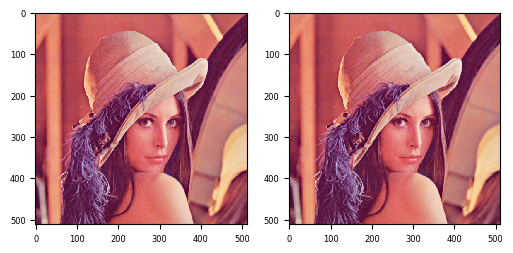

In [9]:
image_new = np.dstack((image_red, image_green, image_blue))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(image_new)

### Aufgabe 4: Plot einer Zeile

Stellen Sie die Bildwerte der Zeile 200 des Grauwert Bildes als Plot dar. Dazu müssen sie die Pixelwerte einer Zeile auslesen wobei Sie wiederum ein (1D) numpy Array erhalten. Dieses kann mit `plt.plot(...)` dargestellt werden. Entspricht das Ergebnis den Erwartungen?

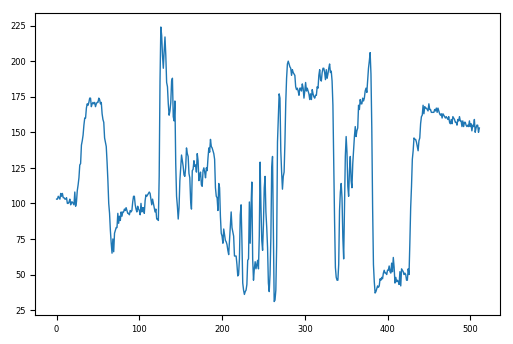

In [10]:
line = image_gray[200]
plt.plot(line)

### Aufgabe 5: Histogramm und Histogramm Ausgleich

Das folgenden Bild hat einen schlechten Kontrast. Grauwert Bilder werden per default von OpenCV als 3-Kanal Bilder geladen. Was ist der minimale und maximale Pixelwert im Bild?

min: 74, max: 178


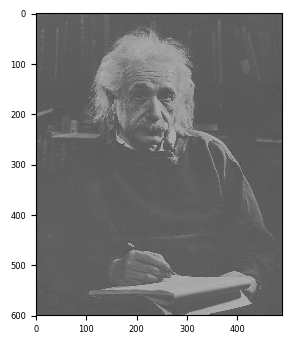

In [11]:
einstein = cv2.imread('images/einstein_low_contrast.png')
einstein_grey = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)
plt.imshow(einstein, cmap='gray')

min = np.amin(einstein_grey)
max = np.amax(einstein_grey)
print('min: {}, max: {}'.format(min, max))

Stellen Sie das Histogramm des Bildes dar. Benutzen Sie dazu die OpenCV Funktion `cv2.calcHist(...)`. Benutzen Sie die OpenCV Dokumentation um die Parameter der Funktion zu ermitteln.


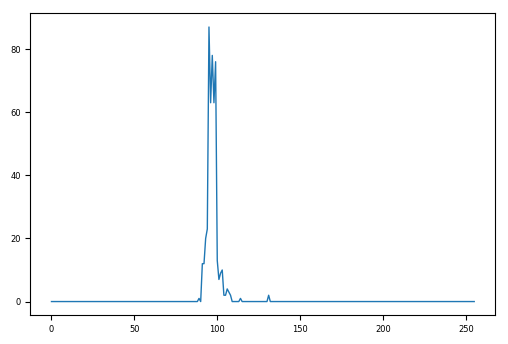

In [12]:
hist = cv2.calcHist(einstein_grey,[0],None,[256],[0,256])
plt.plot(hist)

Führen Sie einen Histogram Ausgleich mit der Funktion `equalizeHist(...)` durch und stellen Sie das Bild und das Histogram des veränderten Bildes dar.

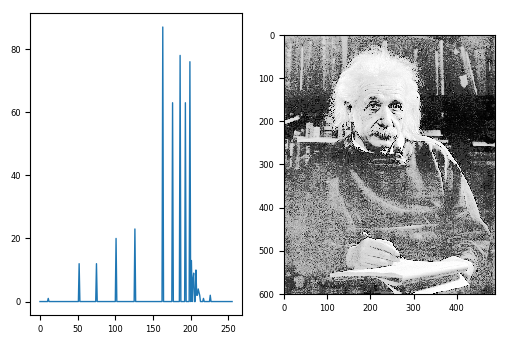

In [13]:
einstein_equal = cv2.equalizeHist(einstein_grey)
hist2 = cv2.calcHist(einstein_equal,[0],None,[256],[0,256])
plt.subplot(1, 2, 1)
plt.plot(hist2)
plt.subplot(1, 2, 2)
plt.imshow(np.stack([einstein_equal, einstein_equal, einstein_equal], axis=2))


### Aufgabe 6: Punktbildfunktionen

In der nächsten Zelle ist eine Funktion definert, die als Eingabe ein Bild enthält, und ein verändertes Bild zurückgibt. Ändern Sie die Funktion, sodass das Bild heller (oder dunkler) wird.

In [14]:
def f(newImage, newValue):
    rowSize = len(newImage)
    columnSize = len(newImage[0])
    currentPixel = 0
    
    print(("Dimensions: {0},{1}").format(rowSize,columnSize))
    
    for row in range(0, rowSize):
        for column in range(0, columnSize):
            currentPixel = newImage[row,column] + newValue

            if(currentPixel > 255):
                currentPixel = 255

            if(currentPixel < 0):
                currentPixel = 0
            
            newImage[row,column] = currentPixel
        
    return newImage

Dimensions: 600,490


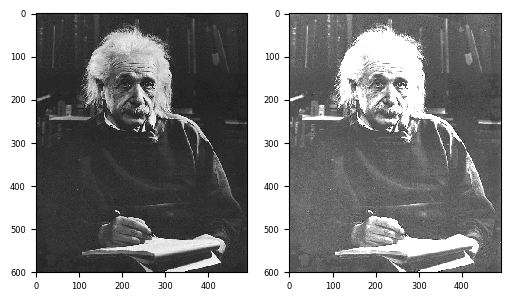

In [15]:
# Be careful with the values! If you set it too high or too low and get a state,
# that every element has the exact same size, you get only a black image from the matplot!
# In this case, with the grayscale image of Einstein, you can use values between -178 & 180
result = f(einstein_grey.copy(), 130)

plt.subplot(1, 2, 1)
plt.imshow(einstein_grey, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')